## Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.

В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).
1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.
2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.
3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.
4. Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия.

In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

- **Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.**

In [2]:
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test

def generate(x, m, b):
    return m*x + b

In [3]:
X = []
y = []

In [4]:
for el in range(1, 11):
    X.append([el, generate(el, 8, 10)])
    X.append([el + 1, generate(el, 8, 10)])
    
    y.append(0)
    y.append(1)

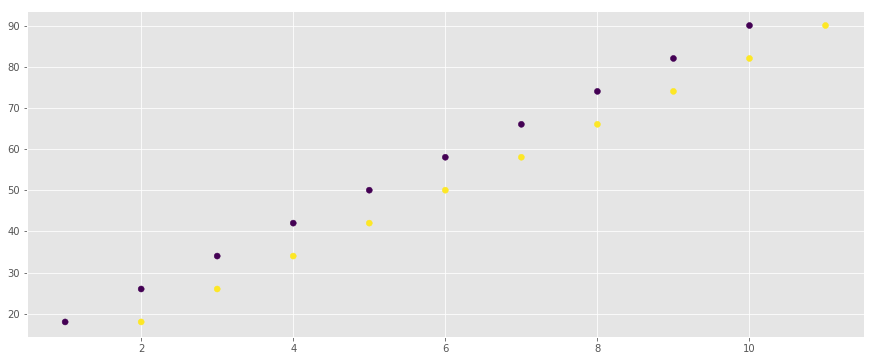

In [5]:
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y);

In [6]:
X_train, X_test, y_train, y_test = train_test(X, y)

In [7]:
def knn(x_train, y_train, x_test, y_test, p=2, metric='minkowski'):
    clf_k = KNeighborsClassifier(n_neighbors=3, p=p, metric=metric)
    clf_k.fit(x_train, y_train) 
    
    return clf_k

In [8]:
clf_k = knn(X_train, y_train, X_test, y_test)
y_pred = clf_k.predict(X_test)
accuracy_score(y_test, y_pred)

0.14285714285714285

In [9]:
def log_reg(x_train, y_train, x_test, y_test):
    clf_lr = LogisticRegression()
    clf_lr.fit(x_train, y_train) 
    
    return clf_lr

In [10]:
clf_lr = log_reg(X_train, y_train, X_test, y_test)
y_pred = clf_lr.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

Метод ближайших соседей работает хуже, чем логистическая регрессия, так как выборка хорошо линейно разделима (см. график, можно провести между классами линию). При этом точки одного класса находятся друг от друга дальше, чем от точек другого класса, поэтому при классификации методом ближайших соседей происходит ошибка в присвоении класса.

- **Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.**

In [11]:
X2, y2 = make_circles(n_samples=1000, noise=0.05, random_state=42)

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test(X2, y2)

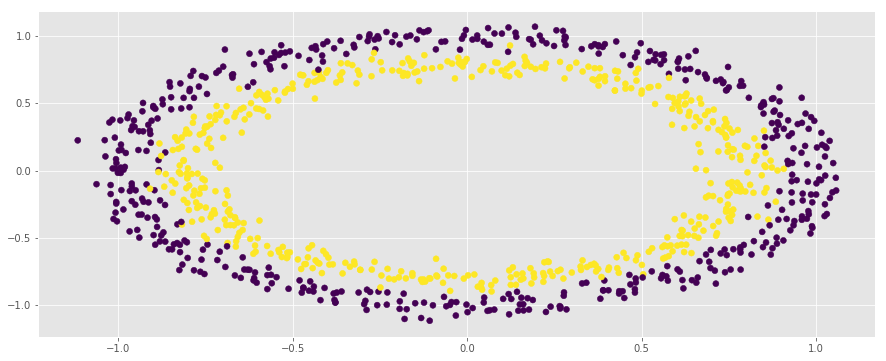

In [13]:
plt.scatter(np.array(X2)[:, 0], np.array(X2)[:, 1], c=y2);

In [14]:
clf = knn(X_train2, y_train2, X_test2, y_test2)
y_pred2 = clf.predict(X_test2)
accuracy_score(y_test2, y_pred2)

0.95151515151515154

In [15]:
clf = log_reg(X_train2, y_train2, X_test2, y_test2)
y_pred2 = clf.predict(X_test2)
accuracy_score(y_test2, y_pred2)

0.5

Логисическая регрессия работает хуже, чем метод ближайших соседей, так как данные линейно неразделимы. Также плюсом для метода ближайших соседей является то, что объекты одного класса находятся ближе друг к другу, чем к объектам другого класса.

- **Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.**

In [16]:
from scipy import spatial

In [17]:
clf_cos = knn(X_train, y_train, X_test, y_test, metric=spatial.distance.cosine)
y_pred = clf_cos.predict(X_test)
accuracy_score(y_test, y_pred)

0.8571428571428571

In [18]:
clf_euc = knn(X_train, y_train, X_test, y_test, metric='euclidean')
y_pred = clf_euc.predict(X_test)
accuracy_score(y_test, y_pred)

0.14285714285714285

**Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, make_scorer

In [29]:
X_r = np.linspace(0, 200, num=100).reshape(-1, 1)
y_r = np.linspace(0, 200, num=100)

In [25]:
# X_r, y_r = make_regression(n_samples=100, n_features=1)

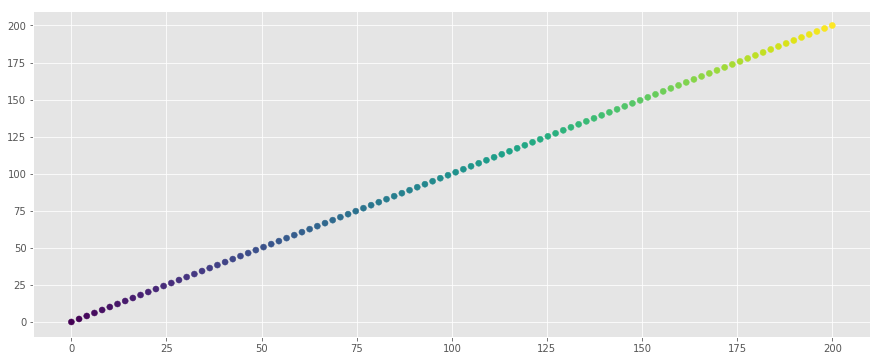

In [30]:
plt.scatter(np.array(X_r), np.array(y_r),c=y_r);

- Вот здесь я не понимаю, почему у меня такие числа получаются:( Вроде бы всё корректно сделано.

In [31]:
tree = DecisionTreeRegressor(random_state=5)
cvs = cross_val_score(tree, X_r, y_r, cv=KFold(5, random_state=30), scoring=make_scorer(mean_squared_error))
np.mean(cvs)

328.53790429548013

In [32]:
lin_reg = LinearRegression()
cvs = cross_val_score(lin_reg, X_r, y_r, cv=KFold(5, random_state=30), scoring=make_scorer(mean_squared_error))
np.mean(cvs)

9.0786254492586446e-28

По идее, решающее дерево должно работать хуже, чем линейная регрессия, так как наши данные линейны. Линейная регрессия наиболее точно опишет данные такого типа.